In [8]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = "AppleGothic"

from sklearn.ensemble import RandomForestRegressor

from pycaret.regression import *
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
import pandas_profiling

In [9]:
df = pd.read_csv('/Users/gimdong-wan/Desktop/DataCampus/data/merge_data/행정동_격자통합_완료2.csv',encoding='cp949')

In [14]:
x = (df['고등학생여']+df['20대여성인'])/df['총인구']

In [12]:
df.head()

,Unnamed: 0,uid,BASE_DATE,ADM_DR_CD,OBJECTID,행정동코드,gid,총인구,남성인구,여성인구,유소년?,고령인구,고등학생여,20대여성인,30대여성인,30년이상34,35년이상건,성폭력취약인구비율,가로등,공영주차장,공중화장실,교육시설,교통사고_19,교통사고_20,노숙인시설,대규모점포,대부업현황,룸살롱,버스정류장,범죄주의구간,보안등,상가,숙박업소,술집,신호등,어린이보호구역,어린이집,오락시설,원룸_오피스텔,유흥(음식+오락),음식점,자율방범대,파출소,횡단보도,cctv
0,0,2272,20200630,3501160,2273,동서학동,다마68ab56ab,145,70,75,0,56,0,8,0,3,39,0.055172414,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2272,20200630,3501160,2273,동서학동,다마68ba55ba,0,0,0,0,0,0,0,0,0,0,#DIV/0!,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2272,20200630,3501160,2273,동서학동,다마68ba55bb,0,0,0,0,0,0,0,0,0,0,#DIV/0!,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2272,20200630,3501160,2273,동서학동,다마68ba56aa,11,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2272,20200630,3501160,2273,동서학동,다마68ba56ab,148,75,73,18,56,0,0,0,2,27,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,0,0,0,0,0,0,4,0,0,0,0,1,1


In [11]:
df = df.fillna(0)

In [7]:
df.to_csv('/Users/gimdong-wan/Desktop/DataCampus/data/merge_data/행정동_격자통합_완료2.csv',encoding='cp949')

In [66]:
df.head(1)

,uid,BASE_DATE,ADM_DR_CD,OBJECTID,행정동코드,범죄주의구간,숙박업소,원룸_오피스텔,유흥업소,CCTV,가로등,면적,총인구 (명),남자인구 (명),여자인구 (명),성폭력취약여성인구수,유흥업소수,유흥업소밀도,숙박업소밀도,성폭력 취약 여성비
0,2272,20200630,3501160,2273,동서학동,0,8,40,0,28,296,16,6494,3216,3278,453,94,6,1,0


In [69]:
df=df.drop(['uid','BASE_DATE','ADM_DR_CD','OBJECTID','행정동코드','성폭력 취약 여성비'],axis=1)

In [70]:
df.describe()

,범죄주의구간,숙박업소,원룸_오피스텔,유흥업소,CCTV,가로등,면적,총인구 (명),남자인구 (명),여자인구 (명),성폭력취약여성인구수,유흥업소수,유흥업소밀도,숙박업소밀도
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,3.685714,11.800000,249.542857,7.857143,38.285714,421.628571,5.828571,19033.628571,9363.40000,9670.228571,1781.142857,364.628571,157.371429,5.771429
std,4.806683,20.526597,287.779362,16.854294,14.975610,352.316710,7.366401,13218.174970,6471.83049,6753.337999,1402.166835,241.098599,132.806158,11.641927
min,0.000000,0.000000,11.000000,0.000000,16.000000,85.000000,1.000000,4266.000000,2115.00000,2151.000000,231.000000,35.000000,5.000000,0.000000
25%,0.000000,0.000000,51.500000,0.000000,27.500000,172.500000,1.000000,10367.000000,5039.00000,5341.000000,903.000000,180.000000,35.500000,0.000000
50%,2.000000,2.000000,148.000000,0.000000,35.000000,386.000000,2.000000,14442.000000,7029.00000,7148.000000,1328.000000,277.000000,124.000000,0.000000
75%,5.000000,15.500000,340.000000,5.000000,52.000000,498.000000,7.500000,21645.500000,10720.00000,11156.000000,2139.000000,546.000000,244.500000,3.000000
max,18.000000,90.000000,1416.000000,61.000000,67.000000,1829.000000,27.000000,61212.000000,30321.00000,30891.000000,5657.000000,1036.000000,490.000000,44.000000


In [71]:
df.corr()

,범죄주의구간,숙박업소,원룸_오피스텔,유흥업소,CCTV,가로등,면적,총인구 (명),남자인구 (명),여자인구 (명),성폭력취약여성인구수,유흥업소수,유흥업소밀도,숙박업소밀도
범죄주의구간,1.000000,0.380015,0.582488,0.231055,0.530004,0.509688,0.025845,0.190643,0.203538,0.178088,0.286389,0.620016,0.177205,0.204186
숙박업소,0.380015,1.000000,-0.009720,0.622987,0.136535,0.108891,-0.034857,-0.295210,-0.286542,-0.303211,-0.263337,0.274797,0.259474,0.868978
원룸_오피스텔,0.582488,-0.009720,1.000000,-0.023754,0.560713,0.754772,-0.057200,0.498797,0.506968,0.490450,0.640604,0.745294,0.281475,-0.123129
유흥업소,0.231055,0.622987,-0.023754,1.000000,0.060993,-0.092835,-0.027446,-0.198434,-0.193210,-0.203235,-0.179286,0.114397,0.212444,0.600906
CCTV,0.530004,0.136535,0.560713,0.060993,1.000000,0.575166,0.079641,0.527162,0.531288,0.522663,0.559157,0.646069,0.121446,0.003591
가로등,0.509688,0.108891,0.754772,-0.092835,0.575166,1.000000,0.279847,0.547382,0.559293,0.535400,0.634730,0.730478,-0.071971,-0.055401
면적,0.025845,-0.034857,-0.057200,-0.027446,0.079641,0.279847,1.000000,0.202441,0.210431,0.194574,0.154751,0.058140,-0.593127,-0.280324
총인구 (명),0.190643,-0.295210,0.498797,-0.198434,0.527162,0.547382,0.202441,1.000000,0.999448,0.999493,0.976886,0.620475,-0.071490,-0.331809
남자인구 (명),0.203538,-0.286542,0.506968,-0.193210,0.531288,0.559293,0.210431,0.999448,1.000000,0.997884,0.976872,0.628803,-0.074724,-0.327573
여자인구 (명),0.178088,-0.303211,0.490450,-0.203235,0.522663,0.535400,0.194574,0.999493,0.997884,1.000000,0.975888,0.611852,-0.068317,-0.335525


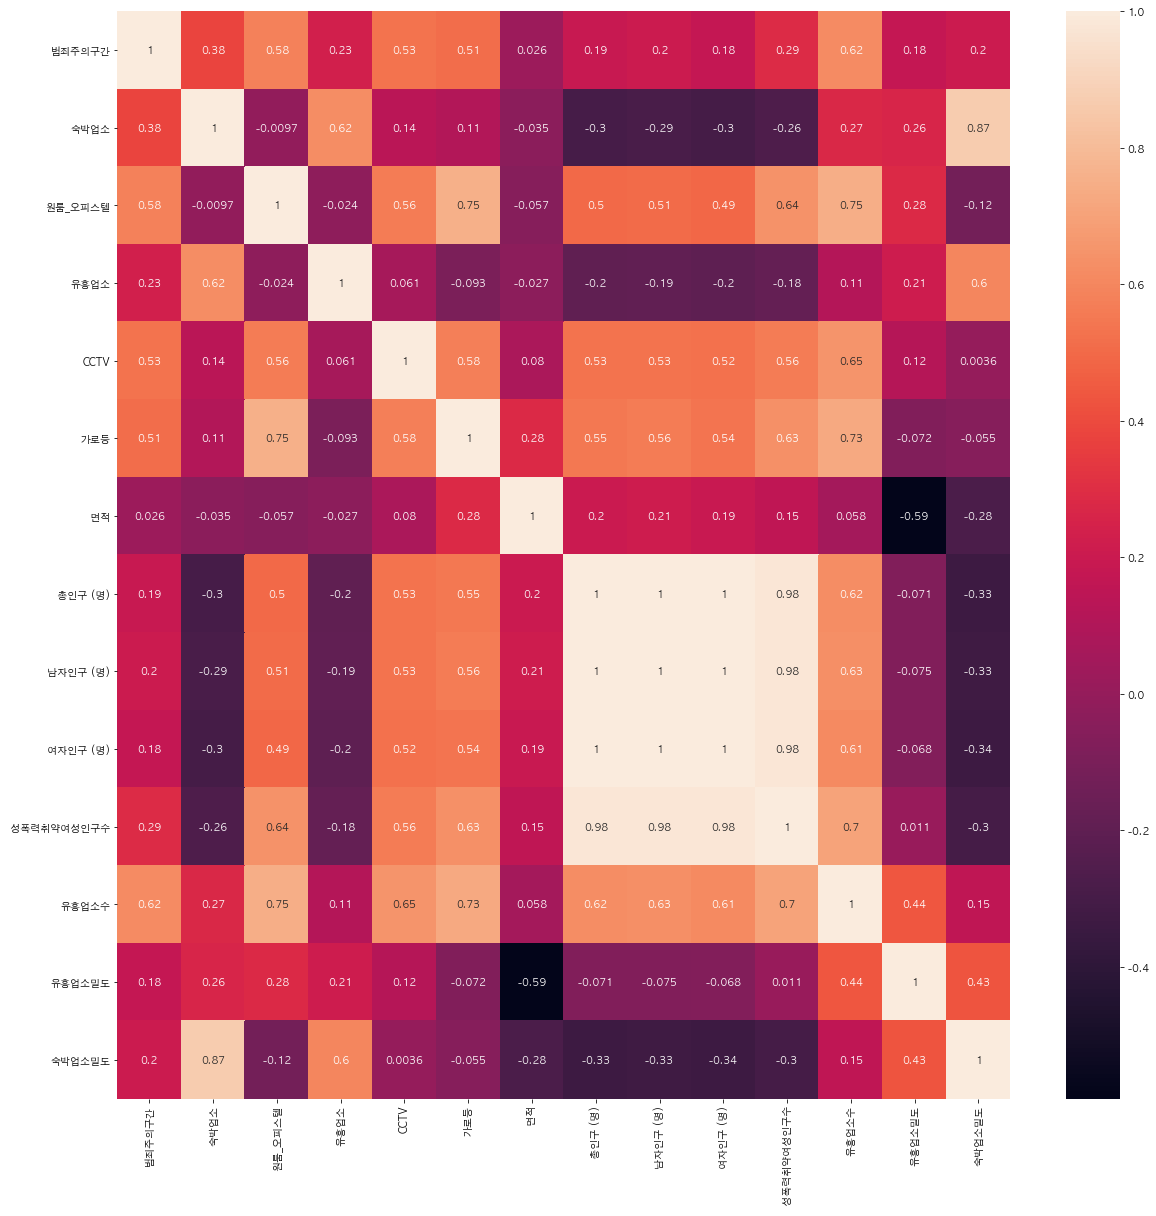

In [72]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
행정동의 변수간 상관관계 분석 결과, 생활안전지도를 기반으로 한 전주시 범죄주의구간과 숙박업소(0.38), 원룸 및 오피스텔(0.58), CCTV(0.53), 가로등(0.51)로 유의미한 상관관계를 나타내는 변수들이 보임.